##### Copyright 2020 Hackaton Bootcamp Data Science.

##### Vanessa Sanchez Malagon

# Redes convolucionales

reconocer imágenes reales de escopeta y pistolas para clasificar una imagen entrante como una u otra. En particular, el reconocimiento de escritura a mano hizo su vida un poco más fácil al tener todas las imágenes del mismo tamaño y forma, y todas eran de color monocromático. Las imágenes del mundo real no son así: tienen diferentes formas, relaciones de aspecto, etc., ¡y generalmente están en color!olor. Real-world images aren't like that -- they're in different shapes, aspect ratios etc, and 

los pasos que vamos a realizar
1. Explore los datos de ejemplo de escopeta y armas
2. Se construye y entrena una red neuronal para reconocer la diferencia entre los dos
3. Evaluar la precisión de la capacitación y la validación

## Explorar los datos

El dataset con las imagenes de las armas estaran en `tmp`.

10 imagenes de pistolas y 10 de escopetas

In [1]:
import os
import zipfile

local_zip = 'armas.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('tmp')
zip_ref.close()

El contenido del .zip se extrae al directorio base `/ tmp / armas`, que contiende` train` y `validation` que a su vez contienen los subdirectorios` escopeta` y `guns`.

En resumen: el conjunto de entrenamiento son los datos que se utilizan para decirle al modelo de red neuronal que 'así es como se ve una escopeta', 'así es como se ve una pistola', etc. El conjunto de datos de validación son imágenes de escopeta y pistolas que la red neuronal no verá como parte del entrenamiento, por lo que puedes probar qué tan bien o qué mal lo hace al evaluar si una imagen contiene una escopeta o una pistola.

Una cosa a la que prestar atención en esta muestra: no etiquetamos explícitamente las imágenes como escopeta o pistolas.

In [2]:
base_dir = 'tmp/armas'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con nuestras armas de entrenamiento 
train_escopeta_dir = os.path.join(train_dir, 'escopeta')
train_guns_dir = os.path.join(train_dir, 'guns')

# Directorio con nuestras armas de validacion 
validation_escopeta_dir = os.path.join(validation_dir, 'escopeta')
validation_guns_dir = os.path.join(validation_dir, 'guns')


Ahora, veamos cómo se ven los nombres de archivo en los directorios `escopeta` y` guns` `train` (las convenciones de nomenclatura de archivos son las mismas en el directorio` validation`):

In [3]:
train_escopeta_fnames = os.listdir( train_escopeta_dir )
train_guns_fnames = os.listdir( train_guns_dir )

validation_escopeta_fnames = os.listdir( validation_escopeta_dir )
validation_guns_fnames = os.listdir( validation_guns_dir )

print("Nombre de los archivos de imágenes para entrenamiento...")
print(train_escopeta_fnames[:10])
print(train_guns_fnames[:10])
print("Nombre de los archivos de imágenes para validación...")
print(validation_escopeta_fnames[:10])
print(validation_guns_fnames[:10])


Nombre de los archivos de imágenes para entrenamiento...
['esco1.jpg', 'esco10.jpg', 'esco2.jpg', 'esco3.jpg', 'esco4.jpg', 'esco5.jpg', 'esco6.jpg', 'esco7.jpg', 'esco8.jpg', 'esco9.jpg']
['gun1.png', 'gun10.jpg', 'gun2.png', 'gun3.png', 'gun4.jpg', 'gun5.jpg', 'gun6.jpg', 'gun7.jpg', 'gun8.jpg', 'gun9.jpg']
Nombre de los archivos de imágenes para validación...
['escopeta1.jpg', 'escopeta2.jpg', 'escopeta3.jpg', 'escopeta4.jpg', 'escopeta5.jpg']
['pistola1.jpg', 'pistola2.jpg', 'pistola3.jpg', 'pistola4.jpg', 'pistola5.jpg']


El número total de imágenes de escopeta y armas en los directorios `train` y` validation`:

In [4]:
print('total training escopeta images :', len(os.listdir(train_escopeta_dir ) ))
print('total training guns images :', len(os.listdir(train_guns_dir ) ))

print('total validation escopeta images :', len(os.listdir( validation_escopeta_dir ) ))
print('total validation guns images :', len(os.listdir( validation_guns_dir ) ))

total training escopeta images : 10
total training guns images : 10
total validation escopeta images : 5
total validation guns images : 5


Tanto para escopetas como pistolas tenemos en entrenamiento 10 y en validacion 5.



In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Ahora, muestre un lote de 8 escopetas y 8 imágenes de armas. Puede volver a ejecutar la celda para ver un lote nuevo cada vez:

M O S T R A N D O  U N  S U B C O N J U N T O  D E  L A S  I M Á G E N E S  P A R A  E N T R E N A M I E N T O


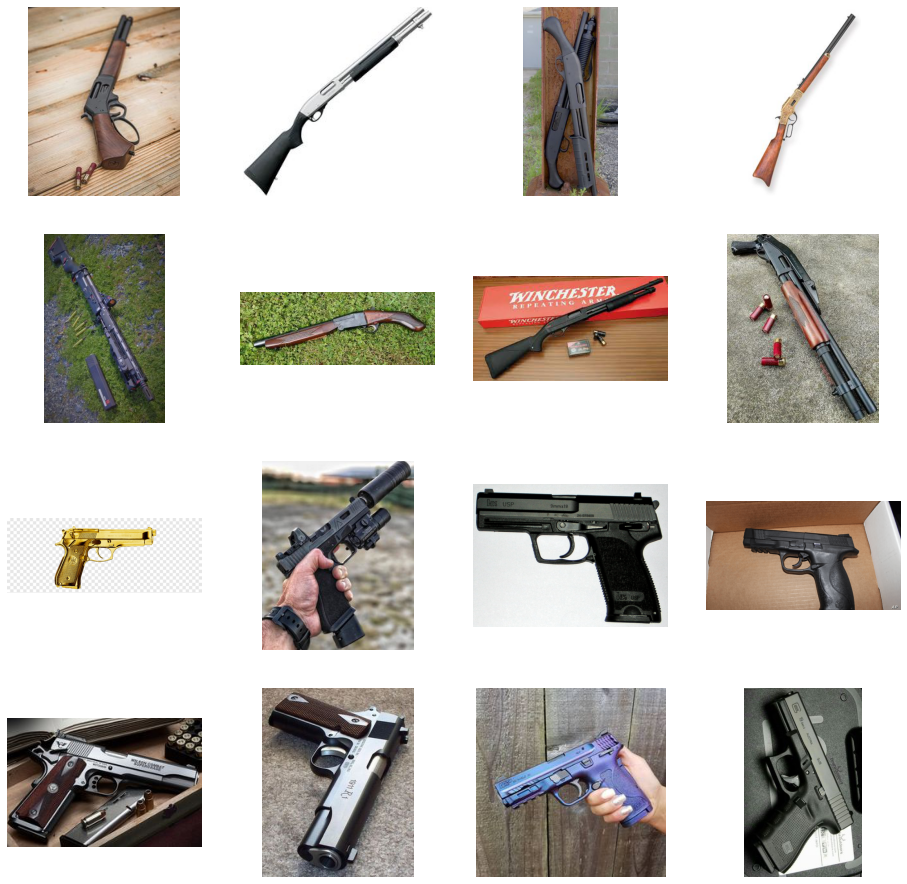

M O S T R A N D O   U N   S U B C O N J U N T O   D E   L A S   I M Á G E N E S   P A R A   V A L I D A C I Ó N


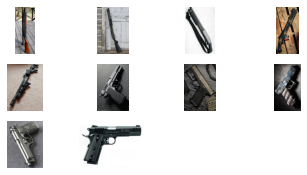

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_escopeta_pix = [os.path.join(train_escopeta_dir, fname) 
                for fname in train_escopeta_fnames[ pic_index-8:pic_index] 
               ]

next_guns_pix = [os.path.join(train_guns_dir, fname) 
                for fname in train_guns_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

print("M O S T R A N D O  U N  S U B C O N J U N T O  D E  L A S  I M Á G E N E S  P A R A  E N T R E N A M I E N T O")
plt.show() 


next_escopeta_pix = [os.path.join(validation_escopeta_dir, fname) 
                for fname in validation_escopeta_fnames[ pic_index-8:pic_index] 
               ]

next_guns_pix = [os.path.join(validation_guns_dir, fname) 
                for fname in validation_guns_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
print("M O S T R A N D O   U N   S U B C O N J U N T O   D E   L A S   I M Á G E N E S   P A R A   V A L I D A C I Ó N")
plt.show()

En este paso definimps el modelo que será entrenado para reconocer escopeta o armas de fuego a partir de estas imágenes.

## Creación de un modelo pequeño desde cero para alcanzar una precisión de ~ 50%

In [7]:
import tensorflow as tf

A continuación, definiremos una capa secuencial como antes, agregando algunas capas convolucionales primero. Tenga en cuenta el parámetro de forma de entrada esta vez. En el ejemplo anterior era 28x28x1, porque la imagen tenía 28x28 en escala de grises (8 bits, 1 byte para la profundidad de color). Esta vez es 150x150 para el tamaño y 3 (24 bits, 3 bytes) para la profundidad de color.

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('escopeta') and 1 for the other ('guns')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

La llamada al método model.summary () imprime un resumen de la NN

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

La columna "forma de salida" muestra cómo evoluciona el tamaño de su mapa de características en cada capa sucesiva. Las capas de convolución reducen un poco el tamaño de los mapas de características debido al relleno, y cada capa de agrupación reduce a la mitad las dimensiones.

Durante el entrenamiento, queremos monitorear la precisión del alcance de la clasificación.

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Data Preprocessing

Configuramos los generadores de datos que leeran imagenes y las convertirar a tensores y alimentaran a nuestra red con las etiquetas .
Los datos siempre deben de normalizarse, para eso se utiliza keras 
le permite crear instancias de generadores de lotes de imágenes aumentadas (y sus etiquetas)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


### Training
Entrenemos en las 30 imágenes disponibles, durante 10 épocas.






In [18]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=2,
                              epochs=10,
                              validation_steps=5,
                              verbose=2)

Epoch 1/10
1/2 - 1s - loss: 2.7577 - accuracy: 0.5000 - val_loss: 5.3112 - val_accuracy: 0.5000


###Ejecutando el modelo

la ejecución real de una predicción utilizando el modelo. Este código le permitirá elegir 1 o más archivos de su sistema de archivos, luego los cargará y los ejecutará a través del modelo, dando como resultado si el objeto es una pistola o una escopeta.

In [16]:
import numpy as np

from keras.preprocessing import image

for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):

  # predicting images
  img=image.load_img(img_path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(img_path + " es una escopeta")
    
  else:
    print(img_path + " es una pistola")
 

[1.]
tmp/armas\validation\escopeta\escopeta1.jpg es una escopeta
[1.]
tmp/armas\validation\escopeta\escopeta2.jpg es una escopeta
[1.]
tmp/armas\validation\escopeta\escopeta3.jpg es una escopeta
[1.]
tmp/armas\validation\escopeta\escopeta4.jpg es una escopeta
[1.]
tmp/armas\validation\escopeta\escopeta5.jpg es una escopeta
[1.]
tmp/armas\validation\guns\pistola1.jpg es una escopeta
[1.]
tmp/armas\validation\guns\pistola2.jpg es una escopeta
[1.]
tmp/armas\validation\guns\pistola3.jpg es una escopeta
[1.]
tmp/armas\validation\guns\pistola4.jpg es una escopeta
[1.]
tmp/armas\validation\guns\pistola5.jpg es una escopeta


### Visualización de representaciones intermedias

Escojamos una imagen de escopeta o armas al azar del conjunto de entrenamiento y luego generemos una figura en la que cada fila es la salida de una capa, y cada imagen de la fila es un filtro específico en ese mapa de características de salida. Vuelva a ejecutar esta celda para generar representaciones intermedias para una variedad de imágenes de entrenamiento.

<ipython-input-14-0bcb336dffde>:55: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


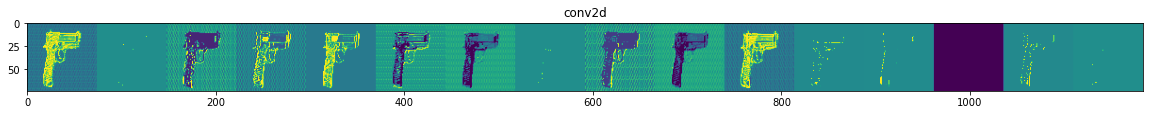

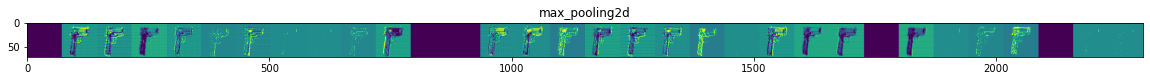

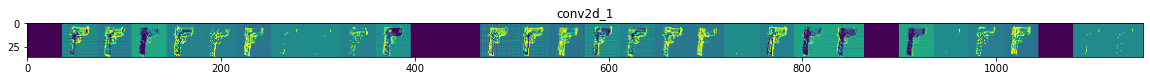

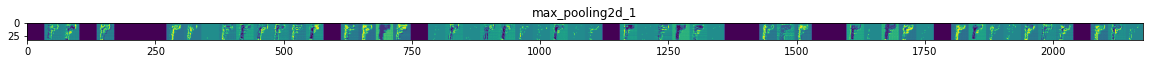

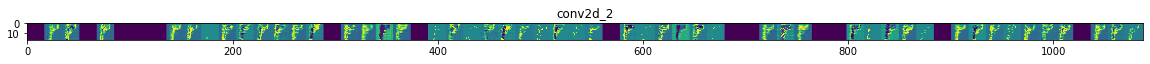

In [14]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a escopeta or guns from the training set.
escopeta_img_files = [os.path.join(train_escopeta_dir, f) for f in train_escopeta_fnames]
guns_img_files = [os.path.join(train_guns_dir, f) for f in train_guns_fnames]

img_path = random.choice(escopeta_img_files + guns_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Como ves pasamos de los píxeles en bruto de las imágenes a representaciones cada vez más abstractas y compactas. Las representaciones en sentido descendente comienzan a resaltar aquello a lo que la red presta atención y muestran cada vez menos funciones que se "activan"; la mayoría se ponen a cero. A esto se le llama "escasez". La escasez de representación es una característica clave del aprendizaje profundo.


Estas representaciones llevan cada vez menos información sobre los píxeles originales de la imagen, pero información cada vez más refinada sobre la clase de la imagen. Puede pensar en un convnet (o una red profunda en general) como una tubería de destilación de información.

### Evaluación de la precisión y la pérdida del modelo

Grafiquemos la precisión y la pérdida del entrenamiento / validación tal como se recopilaron durante el entrenamiento:

Text(0.5, 1.0, 'Training and validation loss')

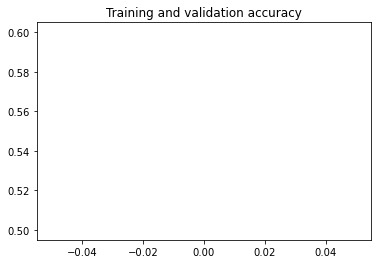

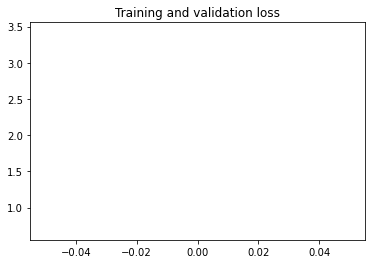

In [17]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )